In [1]:
import os
import uproot
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

#os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

import keras.backend as K

from keras.models import Sequential
from keras.layers import Dense

from keras.models import Model
from keras.layers import Dense, Input, Dropout, MaxPooling2D, Flatten
from keras import regularizers
from keras.layers.merge import concatenate
import keras.losses

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from scipy.stats import ks_2samp

os.chdir('../src/')
import ml_analysis_plotting

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

The cell below accesses and orients the input arrays correctly

In [2]:
def  get_input_arrays(tree, features_list):
    array = np.transpose(tree.arrays(features_list, outputtype=tuple))
    print(array.shape)
    print(array[0])
    return array

In [3]:
os.chdir('../data')

In [4]:
#tree1 = uproot.open('user.pavol.19077317._000001.reco_copy.root')[b'newtree;1']
#tree2 = uproot.open('spin_data_01.root')[b'spin_truth;1']
#tree1 = uproot.open('user.fisopkov.19389493._000001.reco_copy.root')[b'spin_truth;1']
#tree = uproot.open('full_spin_04_big.root')[b'spin_truth;1']
#tree = uproot.open('inputsFeb2020/user.fisopkov.19389493._000197.reco_copy.root')[b'features;1']
tree = uproot.open("common_nTupe_v1_MC16dSignal_copy.root")["features"]
tree.keys()

FileNotFoundError: [Errno 2] No such file or directory: 'common_nTupe_v1_MC16dSignal_copy.root'

In [24]:
'''
a = tree1.array(b'kk')
b = tree2.array(b'kk')
c = tree3.array(b'kk')
_=plt.hist(a, bins=40, density=True, histtype='step', linewidth=2., label='1')
plt.legend()
plt.show()
_=plt.hist(b, bins=40, density=True, histtype='step', linewidth=2., label='2')
plt.legend()
plt.show()
_=plt.hist(c, bins=40, density=True, histtype='step', linewidth=2., label='3')
plt.legend()
plt.show()
'''

"\na = tree1.array(b'kk')\nb = tree2.array(b'kk')\nc = tree3.array(b'kk')\n_=plt.hist(a, bins=40, density=True, histtype='step', linewidth=2., label='1')\nplt.legend()\nplt.show()\n_=plt.hist(b, bins=40, density=True, histtype='step', linewidth=2., label='2')\nplt.legend()\nplt.show()\n_=plt.hist(c, bins=40, density=True, histtype='step', linewidth=2., label='3')\nplt.legend()\nplt.show()\n"

In [25]:
'''
fig, ax = plt.subplots(figsize=(20,10))
bins=np.histogram(np.hstack((a,b,c)), bins=40)[1]
_=plt.hist(a, bins, density=True, histtype='step', linewidth=2.)
_=plt.hist(b, bins, density=True, histtype='step', linewidth=2.)
_=plt.hist(c, bins, density=True, histtype='step', linewidth=2.)
'''

"\nfig, ax = plt.subplots(figsize=(20,10))\nbins=np.histogram(np.hstack((a,b,c)), bins=40)[1]\n_=plt.hist(a, bins, density=True, histtype='step', linewidth=2.)\n_=plt.hist(b, bins, density=True, histtype='step', linewidth=2.)\n_=plt.hist(c, bins, density=True, histtype='step', linewidth=2.)\n"

In [26]:
## truth
#features_list = [
#b'top_eta',
#b'top_phi',
#b'top_pt',
#b'tbar_eta',
#b'tbar_phi',
#b'tbar_pt',
#b'lep_t_pt',
#b'lep_t_eta',
#b'lep_t_phi',
#b'lep_tbar_pt',
#b'lep_tbar_eta',
#b'lep_tbar_phi',
#b'lep_delta_phi',
#b'lep_delta_eta',
#b'top_delta_phi',
#b'top_delta_eta'
#]

## truth, observable
#features_list = [
# b'b1_pt',
# b'b1_eta',
# b'b1_phi',
# b'b2_pt',
# b'b2_eta',
# b'b2_phi',
# b'lep_t_pt',
# b'lep_t_eta',
# b'lep_t_phi',
# b'lep_tbar_pt',
# b'lep_tbar_eta',
# b'lep_tbar_phi',
# b'met_x',
# b'met_y'
#]


## reconstructed
features_list = [
#b'reco_top_pt',
#b'reco_top_eta',
#b'reco_top_phi',
#b'reco_t_m',
#b'reco_tbar_pt',
#b'reco_tbar_eta',
#b'reco_tbar_phi',
#b'reco_tbar_m',
b'reco_met',
b'reco_lep_1_pt',
b'reco_lep_1_eta',
b'reco_lep_1_phi',
b'reco_lep_1_e',
b'reco_lep_2_pt',
b'reco_lep_2_eta',
b'reco_lep_2_phi',
b'reco_lep_2_e',
b'reco_bjet_1_pt',
b'reco_bjet_1_eta',
b'reco_bjet_1_phi',
b'reco_bjet_1_e',
b'reco_bjet_2_pt',
b'reco_bjet_2_eta',
b'reco_bjet_2_phi',
b'reco_bjet_2_e',
]

## reconstructed
#features_list = [
#b'top_pt',
#b'tbar_pt',
    # DELTAS
#b'lep_delta_phi',
#b'lep_delta_eta',
#b'top_delta_phi',
#b'top_delta_eta'
#]


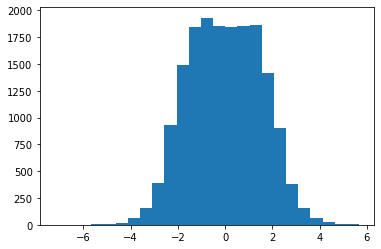

In [53]:
target = tree.array(b'top_eta')#[np.where(spin_target !=  -10.)[0]]
#cut = np.where(target > 0.99)[0]
#target = target[cut]
h,b,_=plt.hist(target, bins=25)


In [54]:
#np.where(spin_target ==  -10.)[0]

b'reco_met'


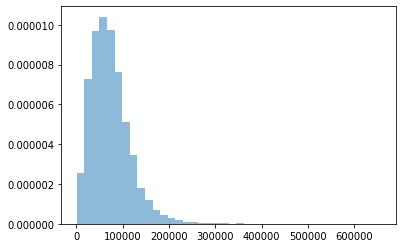

b'reco_lep_1_pt'


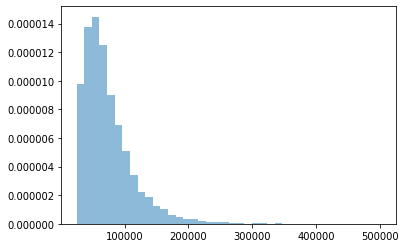

b'reco_lep_1_eta'


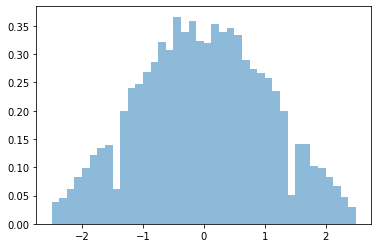

b'reco_lep_1_phi'


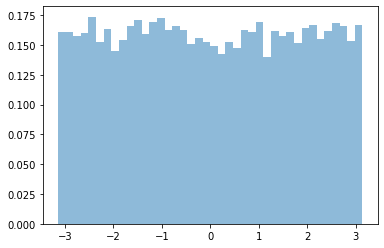

b'reco_lep_1_e'


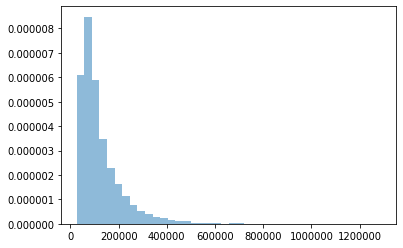

b'reco_lep_2_pt'


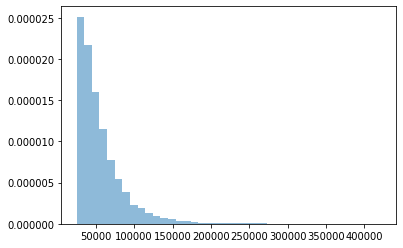

b'reco_lep_2_eta'


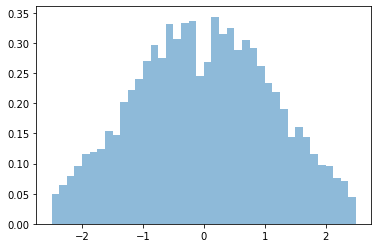

b'reco_lep_2_phi'


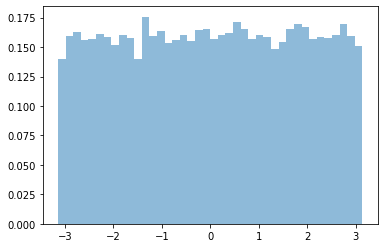

b'reco_lep_2_e'


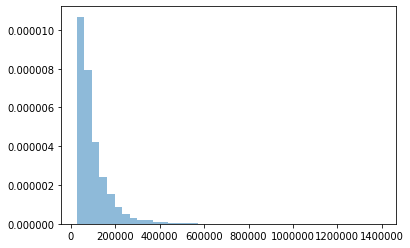

b'reco_bjet_1_pt'


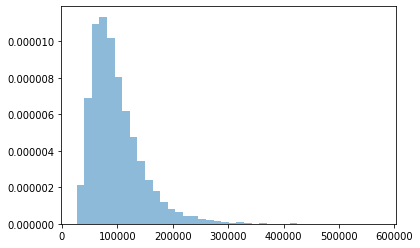

b'reco_bjet_1_eta'


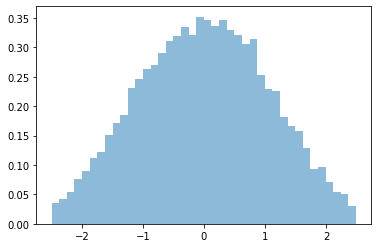

b'reco_bjet_1_phi'


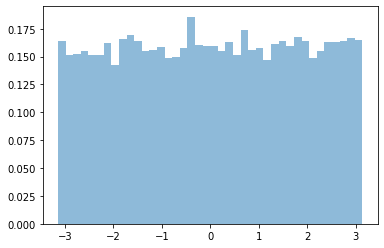

b'reco_bjet_1_e'


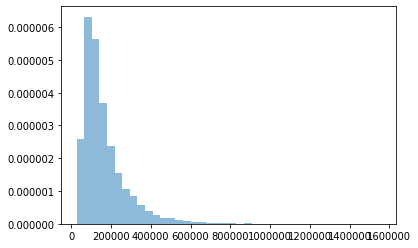

b'reco_bjet_2_pt'


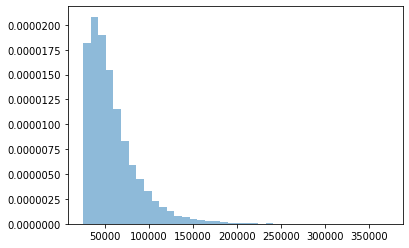

b'reco_bjet_2_eta'


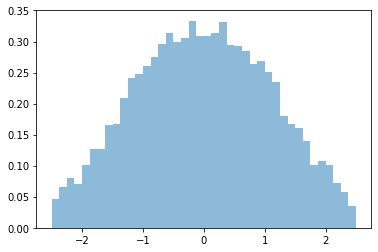

b'reco_bjet_2_phi'


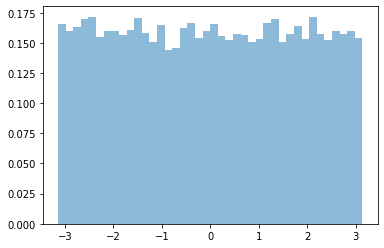

b'reco_bjet_2_e'


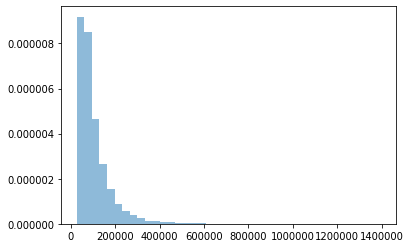

In [55]:
for feature in features_list:
    print(feature)
    #plt.hist(tree1.array(feature),bins=40,density=True,alpha=.8)
    plt.hist(tree.array(feature),bins=40,density=True,alpha=.5)
    #plt.savefig('NW_weight_dist')
    plt.show()

In [56]:
"""print(features_list[-1])
plt.hist(tree.array(feature),bins=40,density=False,alpha=.5)
#plt.legend(fontsize=30)
plt.xlabel('NW weight', fontsize=20)
plt.ylabel('events', fontsize=20)
plt.title('MC16d Signal (nominal)', fontsize=25)
plt.savefig('NW_weight_dist')
#plt.show()
"""

"print(features_list[-1])\nplt.hist(tree.array(feature),bins=40,density=False,alpha=.5)\n#plt.legend(fontsize=30)\nplt.xlabel('NW weight', fontsize=20)\nplt.ylabel('events', fontsize=20)\nplt.title('MC16d Signal (nominal)', fontsize=25)\nplt.savefig('NW_weight_dist')\n#plt.show()\n"

In [57]:
weights = 1/(h * 1/np.max(h))
print(weights)
locs = np.digitize(target, b)
weights_array = np.zeros(len(target))
for i in range(len(weights)):
    weights_array[np.where(locs == i+1)[0]] = weights[i]
#plt.hist(tree.array(feature),bins=40,density=True,alpha=.5)
#plt.show()

[1.93000000e+03 1.93000000e+03 9.65000000e+02 4.82500000e+02
 1.93000000e+02 1.28666667e+02 2.96923077e+01 1.23717949e+01
 4.97422680e+00 2.07526882e+00 1.29269926e+00 1.04493774e+00
 1.00000000e+00 1.04380746e+00 1.04550379e+00 1.03987069e+00
 1.03651987e+00 1.36685552e+00 2.14444444e+00 5.07894737e+00
 1.22151899e+01 3.01562500e+01 7.14814815e+01 3.86000000e+02
 4.82500000e+02]


(array([1930. , 1930. , 1930. , 1930. , 1930. , 1930. , 1930. , 1930. ,
        1930. , 1930. , 1930. , 1930. , 1930. , 1930. , 1930. , 1930. ,
        1930. , 1930. , 1930. , 1930. , 1930. , 1930. , 1930. , 1930. ,
        1447.5]),
 array([-7.21430016e+00, -6.69867376e+00, -6.18304737e+00, -5.66742098e+00,
        -5.15179459e+00, -4.63616819e+00, -4.12054180e+00, -3.60491541e+00,
        -3.08928902e+00, -2.57366262e+00, -2.05803623e+00, -1.54240984e+00,
        -1.02678345e+00, -5.11157055e-01,  4.46933747e-03,  5.20095730e-01,
         1.03572212e+00,  1.55134851e+00,  2.06697491e+00,  2.58260130e+00,
         3.09822769e+00,  3.61385408e+00,  4.12948048e+00,  4.64510687e+00,
         5.16073326e+00,  5.67635965e+00]),
 <a list of 25 Patch objects>)

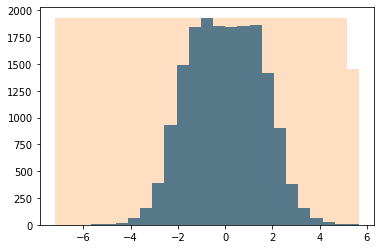

In [58]:
plt.hist(target,bins=25)
plt.hist(target,bins=25,weights=weights_array,alpha=.25)

### This scales the target in order for the ML to be successful

In [59]:
NW_transformer = RobustScaler()
target_scaled = NW_transformer.fit_transform(target.reshape(-1,1))
target_scaled = (target_scaled - np.min(target_scaled))/(np.max(target_scaled) - np.min(target_scaled))
print(target_scaled.shape)

(17205, 1)


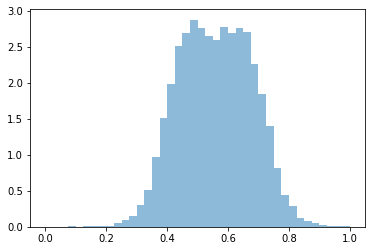

In [60]:
plt.hist(target_scaled,bins=40,density=True,alpha=.5)
plt.show()

In [61]:
features_array = get_input_arrays(tree, features_list)

(17205, 17)
[ 7.94312422e+04  3.77081016e+04  5.56574404e-01 -2.89140248e+00
  4.37009531e+04  3.21592344e+04 -4.01238233e-01 -1.66794395e+00
  3.47830039e+04  7.14602188e+04  8.10855389e-01  2.30105042e+00
  9.65793594e+04  3.33300859e+04 -3.80261242e-01 -1.02961063e+00
  3.60887539e+04]


In [62]:
print(target[:10])
print(weights_array[:10])

[-0.01779249 -0.40865102  1.1068666  -1.67525518  1.46870494  0.51797014
  2.21109438 -0.81748122 -1.13935328  0.5890916 ]
[1.04380746 1.04380746 1.03651987 1.29269926 1.03651987 1.04550379
 2.14444444 1.         1.04493774 1.03987069]


In [63]:
np.where(np.isnan(features_array) == True)

(array([], dtype=int64), array([], dtype=int64))

In [64]:
transformer = RobustScaler()
features_array_scaled = transformer.fit_transform(features_array)
print(features_array_scaled.shape)

(17205, 17)


In [65]:
model = Sequential()
model.add(Dense(200, input_dim=len(features_list), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [66]:
'''
def multihead_model(features_list):

    t_input = Input(shape=(features_list), name="t_input")
    
    nu_input = Input(shape=(features_list), name="nu_input")
    
    t1 = Dense(200, activation="relu")(t_input)
    #x2 = Dropout(0.2)(x2)
    t2 = Dense(100, activation="relu")(t1)
    #x2 = Dropout(0.2)(x2)
    t3 = Dense(50, activation="relu")(t2)
    #x2 = Dropout(0.2)(x2)
    
    nu1 = Dense(200, activation="relu")(nu_input)
    #x2 = Dropout(0.2)(x2)
    nu2 = Dense(100, activation="relu")(nu1)
    #x2 = Dropout(0.2)(x2)
    nu3 = Dense(50, activation="relu")(nu2)
    #x2 = Dropout(0.2)(x2)

    x = concatenate([t3, nu3])

    x = Dense(25, activation="relu")(x)
    #x = Dropout(0.2)(x)
    #x = Dense(32, activation="relu")(x)
    #x = Dropout(0.2)(x)

    output = Dense(1, activation="sigmoid", name="main_output")(x)

    model = Model(inputs=[t_input, nu_input], outputs=output)

    return model
'''

'\ndef multihead_model(features_list):\n\n    t_input = Input(shape=(features_list), name="t_input")\n    \n    nu_input = Input(shape=(features_list), name="nu_input")\n    \n    t1 = Dense(200, activation="relu")(t_input)\n    #x2 = Dropout(0.2)(x2)\n    t2 = Dense(100, activation="relu")(t1)\n    #x2 = Dropout(0.2)(x2)\n    t3 = Dense(50, activation="relu")(t2)\n    #x2 = Dropout(0.2)(x2)\n    \n    nu1 = Dense(200, activation="relu")(nu_input)\n    #x2 = Dropout(0.2)(x2)\n    nu2 = Dense(100, activation="relu")(nu1)\n    #x2 = Dropout(0.2)(x2)\n    nu3 = Dense(50, activation="relu")(nu2)\n    #x2 = Dropout(0.2)(x2)\n\n    x = concatenate([t3, nu3])\n\n    x = Dense(25, activation="relu")(x)\n    #x = Dropout(0.2)(x)\n    #x = Dense(32, activation="relu")(x)\n    #x = Dropout(0.2)(x)\n\n    output = Dense(1, activation="sigmoid", name="main_output")(x)\n\n    model = Model(inputs=[t_input, nu_input], outputs=output)\n\n    return model\n'

In [67]:
#model = multihead_model(features_list)

In [68]:
def custom_loss(y_true, y_pred):
    
    return ((K.abs(y_pred) * 1.0) * keras.losses.logcosh(y_pred, y_true))
    #return (keras.losses.logcosh(y_pred, y_true))

In [69]:
#model.compile(loss='logcosh', optimizer='adam', metrics=['mae', 'mse'])
model.compile(loss=custom_loss, optimizer='adam', metrics=['mae', 'mse'])

In [70]:
features_array_scaled, target_scaled = shuffle(features_array_scaled, target_scaled)

In [71]:
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(features_array_scaled, target_scaled, weights_array, test_size=0.2)

In [72]:
print(target_scaled[:10])
print(w_train[:10])

[[0.56698316]
 [0.41421017]
 [0.64436935]
 [0.42662756]
 [0.41474771]
 [0.73289083]
 [0.41338126]
 [0.58626389]
 [0.60629244]
 [0.57333033]]
[1.29269926 1.03987069 1.04493774 1.29269926 1.         1.04380746
 1.03651987 2.07526882 1.04380746 1.        ]


## If you don't redefine/compile/build the model, the weights are 'updated' from the previous training

In [73]:
#history = model.fit(X_train, y_train, epochs=600, batch_size=256, verbose=1, validation_split=.2, sample_weight=w_train)
history = model.fit(X_train, y_train, epochs=600, batch_size=256, verbose=1, validation_split=.2)
'''

'''

'''
histories = []
for i in range(10):
    print("Epoch: "+str(int(i*50+1)))
    history = model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=2, validation_split=.1)
    print("Evaluating:")
    print(model.evaluate(X_test, y_test))
    histories.append(history.history['loss'])
'''

Train on 11011 samples, validate on 2753 samples
Epoch 1/600
11011/11011 [==============================] - 0s 43us/step - loss: 0.0046 - mae: 0.1059 - mse: 0.0176 - val_loss: 0.0033 - val_mae: 0.0929 - val_mse: 0.0125
Epoch 2/600
11011/11011 [==============================] - 0s 20us/step - loss: 0.0032 - mae: 0.0873 - mse: 0.0118 - val_loss: 0.0025 - val_mae: 0.0794 - val_mse: 0.0094
Epoch 3/600
11011/11011 [==============================] - 0s 20us/step - loss: 0.0028 - mae: 0.0814 - mse: 0.0105 - val_loss: 0.0025 - val_mae: 0.0789 - val_mse: 0.0093
Epoch 4/600
11011/11011 [==============================] - 0s 19us/step - loss: 0.0026 - mae: 0.0782 - mse: 0.0097 - val_loss: 0.0024 - val_mae: 0.0768 - val_mse: 0.0089
Epoch 5/600
11011/11011 [==============================] - 0s 20us/step - loss: 0.0025 - mae: 0.0765 - mse: 0.0093 - val_loss: 0.0023 - val_mae: 0.0752 - val_mse: 0.0085
Epoch 6/600
11011/11011 [==============================] - 0s 19us/step - loss: 0.0024 - mae: 0.0748 

Epoch 49/600
11011/11011 [==============================] - 0s 19us/step - loss: 0.0020 - mae: 0.0662 - mse: 0.0071 - val_loss: 0.0019 - val_mae: 0.0655 - val_mse: 0.0068
Epoch 50/600
11011/11011 [==============================] - 0s 19us/step - loss: 0.0020 - mae: 0.0660 - mse: 0.0071 - val_loss: 0.0018 - val_mae: 0.0645 - val_mse: 0.0066
Epoch 51/600
11011/11011 [==============================] - 0s 19us/step - loss: 0.0020 - mae: 0.0663 - mse: 0.0071 - val_loss: 0.0019 - val_mae: 0.0653 - val_mse: 0.0067
Epoch 52/600
11011/11011 [==============================] - 0s 19us/step - loss: 0.0020 - mae: 0.0663 - mse: 0.0071 - val_loss: 0.0018 - val_mae: 0.0647 - val_mse: 0.0067
Epoch 53/600
11011/11011 [==============================] - 0s 19us/step - loss: 0.0020 - mae: 0.0661 - mse: 0.0071 - val_loss: 0.0018 - val_mae: 0.0648 - val_mse: 0.0067
Epoch 54/600
11011/11011 [==============================] - 0s 20us/step - loss: 0.0020 - mae: 0.0662 - mse: 0.0071 - val_loss: 0.0019 - val_mae:

Epoch 97/600
11011/11011 [==============================] - 0s 20us/step - loss: 0.0019 - mae: 0.0648 - mse: 0.0069 - val_loss: 0.0018 - val_mae: 0.0628 - val_mse: 0.0063
Epoch 98/600
11011/11011 [==============================] - 0s 19us/step - loss: 0.0019 - mae: 0.0652 - mse: 0.0069 - val_loss: 0.0018 - val_mae: 0.0633 - val_mse: 0.0064
Epoch 99/600
11011/11011 [==============================] - 0s 19us/step - loss: 0.0019 - mae: 0.0644 - mse: 0.0068 - val_loss: 0.0018 - val_mae: 0.0643 - val_mse: 0.0066
Epoch 100/600
11011/11011 [==============================] - 0s 20us/step - loss: 0.0019 - mae: 0.0652 - mse: 0.0069 - val_loss: 0.0018 - val_mae: 0.0637 - val_mse: 0.0065
Epoch 101/600
11011/11011 [==============================] - 0s 19us/step - loss: 0.0019 - mae: 0.0649 - mse: 0.0069 - val_loss: 0.0018 - val_mae: 0.0643 - val_mse: 0.0066
Epoch 102/600
11011/11011 [==============================] - 0s 19us/step - loss: 0.0019 - mae: 0.0647 - mse: 0.0068 - val_loss: 0.0018 - val_m

Epoch 145/600
11011/11011 [==============================] - 0s 20us/step - loss: 0.0018 - mae: 0.0638 - mse: 0.0067 - val_loss: 0.0017 - val_mae: 0.0620 - val_mse: 0.0063
Epoch 146/600
11011/11011 [==============================] - 0s 19us/step - loss: 0.0018 - mae: 0.0634 - mse: 0.0066 - val_loss: 0.0017 - val_mae: 0.0623 - val_mse: 0.0063
Epoch 147/600
11011/11011 [==============================] - 0s 19us/step - loss: 0.0018 - mae: 0.0637 - mse: 0.0066 - val_loss: 0.0018 - val_mae: 0.0630 - val_mse: 0.0064
Epoch 148/600
11011/11011 [==============================] - 0s 19us/step - loss: 0.0018 - mae: 0.0637 - mse: 0.0066 - val_loss: 0.0017 - val_mae: 0.0622 - val_mse: 0.0063
Epoch 149/600
11011/11011 [==============================] - 0s 24us/step - loss: 0.0018 - mae: 0.0635 - mse: 0.0066 - val_loss: 0.0018 - val_mae: 0.0628 - val_mse: 0.0064
Epoch 150/600
11011/11011 [==============================] - 0s 25us/step - loss: 0.0019 - mae: 0.0641 - mse: 0.0067 - val_loss: 0.0018 - va

Epoch 240/600
11011/11011 [==============================] - 0s 21us/step - loss: 0.0017 - mae: 0.0622 - mse: 0.0063 - val_loss: 0.0017 - val_mae: 0.0611 - val_mse: 0.0063
Epoch 241/600
11011/11011 [==============================] - 0s 21us/step - loss: 0.0017 - mae: 0.0621 - mse: 0.0063 - val_loss: 0.0018 - val_mae: 0.0621 - val_mse: 0.0064
Epoch 242/600
11011/11011 [==============================] - 0s 20us/step - loss: 0.0018 - mae: 0.0621 - mse: 0.0064 - val_loss: 0.0017 - val_mae: 0.0615 - val_mse: 0.0063
Epoch 243/600
11011/11011 [==============================] - 0s 21us/step - loss: 0.0017 - mae: 0.0619 - mse: 0.0063 - val_loss: 0.0018 - val_mae: 0.0621 - val_mse: 0.0064
Epoch 244/600
11011/11011 [==============================] - 0s 20us/step - loss: 0.0017 - mae: 0.0619 - mse: 0.0063 - val_loss: 0.0017 - val_mae: 0.0611 - val_mse: 0.0062
Epoch 245/600
11011/11011 [==============================] - 0s 20us/step - loss: 0.0018 - mae: 0.0624 - mse: 0.0064 - val_loss: 0.0017 - va

Epoch 335/600
11011/11011 [==============================] - 0s 19us/step - loss: 0.0017 - mae: 0.0607 - mse: 0.0060 - val_loss: 0.0017 - val_mae: 0.0615 - val_mse: 0.0063
Epoch 336/600
11011/11011 [==============================] - 0s 18us/step - loss: 0.0017 - mae: 0.0614 - mse: 0.0062 - val_loss: 0.0017 - val_mae: 0.0614 - val_mse: 0.0063
Epoch 337/600
11011/11011 [==============================] - 0s 18us/step - loss: 0.0017 - mae: 0.0612 - mse: 0.0061 - val_loss: 0.0018 - val_mae: 0.0618 - val_mse: 0.0064
Epoch 338/600
11011/11011 [==============================] - 0s 18us/step - loss: 0.0017 - mae: 0.0607 - mse: 0.0061 - val_loss: 0.0017 - val_mae: 0.0612 - val_mse: 0.0063
Epoch 339/600
11011/11011 [==============================] - 0s 18us/step - loss: 0.0017 - mae: 0.0614 - mse: 0.0062 - val_loss: 0.0017 - val_mae: 0.0615 - val_mse: 0.0063
Epoch 340/600
11011/11011 [==============================] - 0s 19us/step - loss: 0.0017 - mae: 0.0604 - mse: 0.0060 - val_loss: 0.0018 - va

Epoch 430/600
11011/11011 [==============================] - 0s 18us/step - loss: 0.0017 - mae: 0.0605 - mse: 0.0061 - val_loss: 0.0017 - val_mae: 0.0614 - val_mse: 0.0064
Epoch 431/600
11011/11011 [==============================] - 0s 19us/step - loss: 0.0017 - mae: 0.0604 - mse: 0.0060 - val_loss: 0.0018 - val_mae: 0.0618 - val_mse: 0.0064
Epoch 432/600
11011/11011 [==============================] - 0s 19us/step - loss: 0.0017 - mae: 0.0604 - mse: 0.0060 - val_loss: 0.0018 - val_mae: 0.0619 - val_mse: 0.0064
Epoch 433/600
11011/11011 [==============================] - 0s 19us/step - loss: 0.0017 - mae: 0.0608 - mse: 0.0060 - val_loss: 0.0017 - val_mae: 0.0612 - val_mse: 0.0063
Epoch 434/600
11011/11011 [==============================] - 0s 19us/step - loss: 0.0016 - mae: 0.0600 - mse: 0.0059 - val_loss: 0.0018 - val_mae: 0.0618 - val_mse: 0.0064
Epoch 435/600
11011/11011 [==============================] - 0s 19us/step - loss: 0.0017 - mae: 0.0606 - mse: 0.0061 - val_loss: 0.0018 - va

Epoch 525/600
11011/11011 [==============================] - 0s 19us/step - loss: 0.0016 - mae: 0.0591 - mse: 0.0058 - val_loss: 0.0018 - val_mae: 0.0619 - val_mse: 0.0065
Epoch 526/600
11011/11011 [==============================] - 0s 18us/step - loss: 0.0016 - mae: 0.0591 - mse: 0.0058 - val_loss: 0.0018 - val_mae: 0.0614 - val_mse: 0.0065
Epoch 527/600
11011/11011 [==============================] - 0s 18us/step - loss: 0.0016 - mae: 0.0597 - mse: 0.0059 - val_loss: 0.0018 - val_mae: 0.0616 - val_mse: 0.0065
Epoch 528/600
11011/11011 [==============================] - 0s 17us/step - loss: 0.0016 - mae: 0.0590 - mse: 0.0058 - val_loss: 0.0018 - val_mae: 0.0620 - val_mse: 0.0065
Epoch 529/600
11011/11011 [==============================] - 0s 18us/step - loss: 0.0016 - mae: 0.0596 - mse: 0.0059 - val_loss: 0.0018 - val_mae: 0.0619 - val_mse: 0.0065
Epoch 530/600
11011/11011 [==============================] - 0s 19us/step - loss: 0.0016 - mae: 0.0594 - mse: 0.0058 - val_loss: 0.0018 - va

'\nhistories = []\nfor i in range(10):\n    print("Epoch: "+str(int(i*50+1)))\n    history = model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=2, validation_split=.1)\n    print("Evaluating:")\n    print(model.evaluate(X_test, y_test))\n    histories.append(history.history[\'loss\'])\n'

In [74]:
model.save_weights('model_weights.h5')

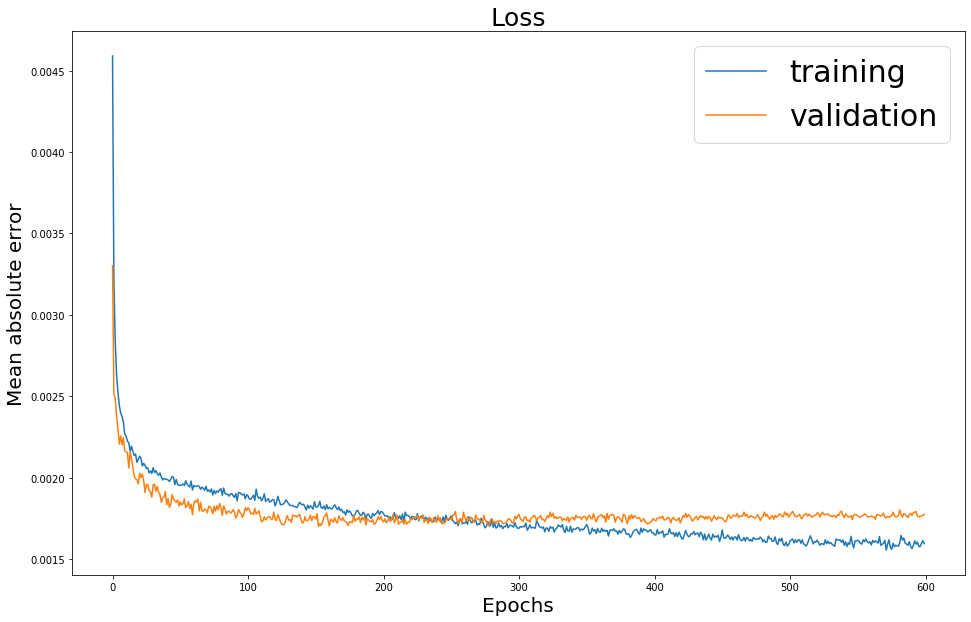

In [75]:
fig, ax = plt.subplots(figsize=(16, 10))
'''
for i in range(1):
    plt.scatter(range(len(histories[i])), histories[i])
'''
#history_hist = plt.hist(history.history['loss'], bins=50)
plt.plot(range(len(history.history['loss'])), history.history['loss'], label='training')
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'], label='validation')
plt.legend(fontsize=30)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Mean absolute error', fontsize=20)
plt.title('Loss', fontsize=25)
plt.savefig('loss_600')
plt.show()

In [76]:
y_pred = model.predict(X_test)
print(model.evaluate(X_test, y_test))

3441/3441 [==============================] - 0s 24us/step
[0.001913596726293586, 0.06398306041955948, 0.006992315873503685]


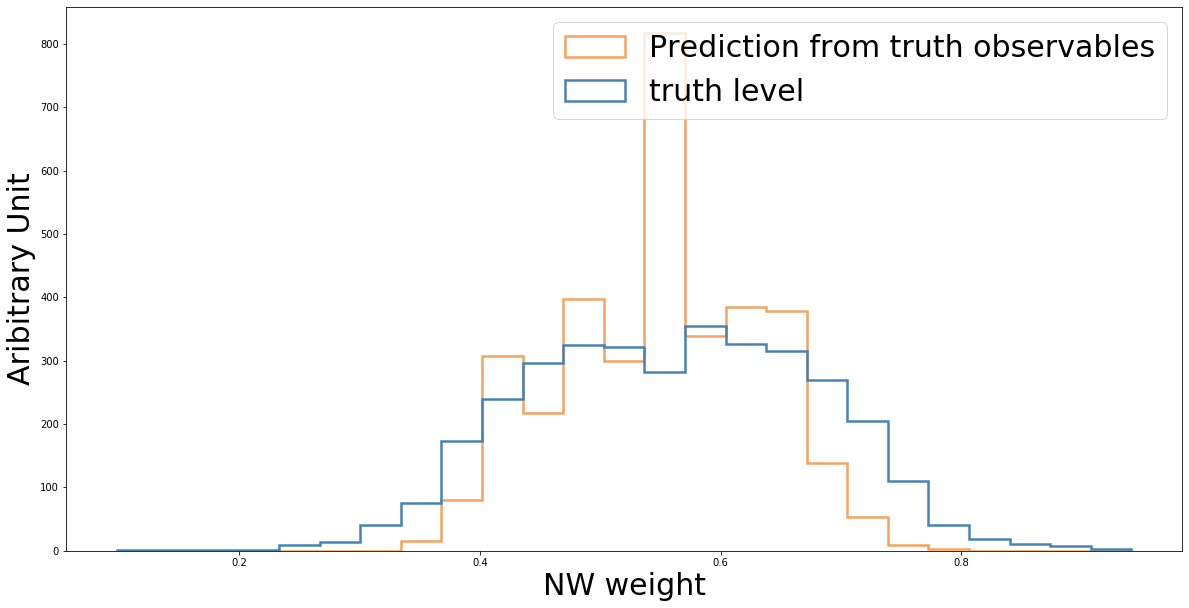

In [77]:
fig, ax = plt.subplots(figsize=(20,10))
a = y_pred
b = y_test
bins=np.histogram(np.hstack((a,b)), bins=25)[1]
h1,b1,_=plt.hist(a, bins, histtype='step', linewidth=2.5, label='Prediction from truth observables', color='sandybrown')
h2,b2,_=plt.hist(b, bins, histtype='step', linewidth=2.5, label='truth level', color='steelblue')
plt.legend(fontsize=30)
plt.xlabel(r'NW weight', fontsize=30)
plt.ylabel('Aribitrary Unit', fontsize=30)
#plt.savefig('truth_obs_arb')
plt.show()

0.4645218542202791


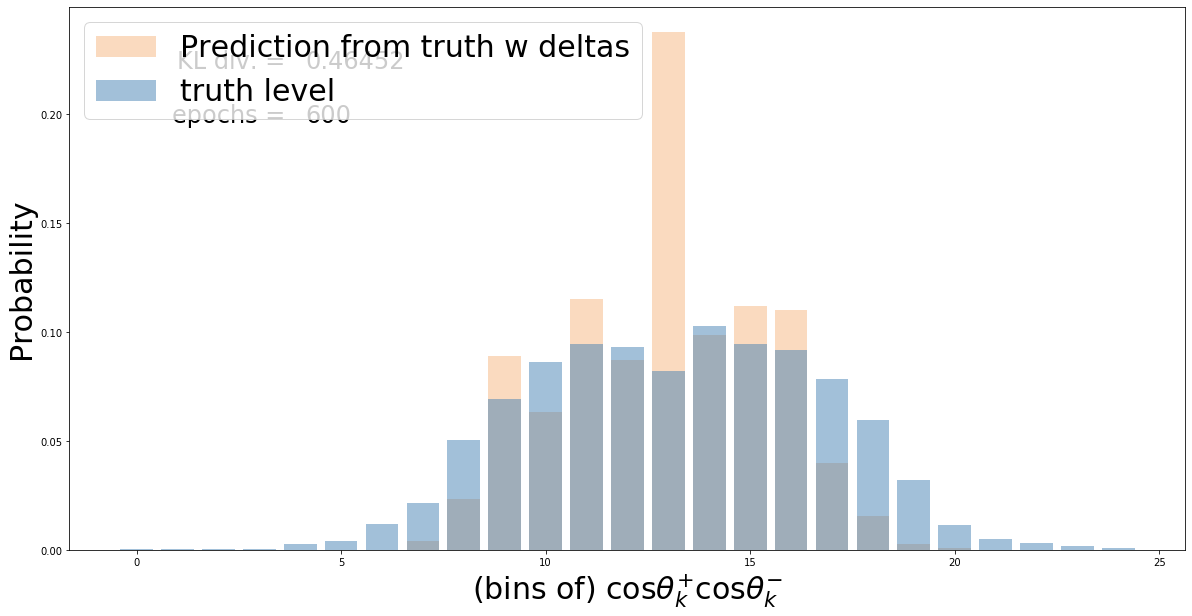

In [78]:
#print(h)
#tot_h1 = 0.0
#ent = 0.0
#for val in h1: 
#    tot_h1 += val
#for val in h1:
#    probh1 = val/tot_h1
#    if probh1 > 0.0:
#        ent += probh1*np.log(1/probh1)   
    #print(val/tot)
#print("entropy:",ent)
#print(b)
#for i in range(len(h1)):
    #print(h1[i]/tot_h1)
## KL divergence ##
KLdiv = 0.0
for i in range(len(h1)):
    #print("bin", i, h2[i]/tot_h)
    truth_prob = h2[i]/np.sum(h2)
    #print(val/len(a), ent)
    pred_prob = h1[i]/np.sum(h1)
    #pred_prob = 0.0
    if pred_prob == 0.0:
        pred_prob = 0.000001
    if truth_prob == 0.0:
        truth_prob = 0.000001
    KLdiv += truth_prob*(np.log(truth_prob) - np.log(pred_prob))
        #print(KLdiv)
        #KLdiv += (np.log(truth_prob) - np.log(pred_prob))
print(KLdiv)
#plt.annotate("test", (1,0.4))

fig, ax = plt.subplots(figsize=(20,10))
plt.bar(range(len(h1)),h1/len(a),alpha=.4, color='sandybrown', label='Prediction from truth w deltas')
plt.bar(range(len(h2)),h2/len(b),alpha=.5, color='steelblue', label='truth level')
plt.legend(fontsize=30)
plt.xlabel(r'(bins of) cos$\theta_{k}^{+}$cos$\theta_{k}^{-}$', fontsize=30)
plt.ylabel('Probability', fontsize=30)

#plt.annotate("Kullback-Leibler divergence:", (.3,.94))
#plt.annotate("Kullback-Leibler divergence:", (.3,.94), fontsize=24)
#fig = plt.figure()
#text='''testt'''
#fig.text(.1,.1,text)
plt.text(0.2, 0.9,'KL div. = ', ha='right', va='center', transform=ax.transAxes, fontsize=24)
plt.text(0.211, 0.9,round(KLdiv,5), ha='left', va='center', transform=ax.transAxes, fontsize=24)

plt.text(0.2, 0.8,'epochs = ', ha='right', va='center', transform=ax.transAxes, fontsize=24)
plt.text(0.211, 0.8,'600', ha='left', va='center', transform=ax.transAxes, fontsize=24)

plt.savefig('probKL_wdeltas')
plt.show()
#print(h1/len(a))

## KL divergence ##
#KLdiv = 0.0
#for i in range(len(h1)):
#    truth_prob = h[i]/tot_h
#    #print(val/len(a), ent)
#    pred_prob = h1[i]/len(a)
#    if pred_prob > 0.0 and truth_prob > 0.0:
#        KLdiv += truth_prob*(np.log(truth_prob) - np.log(pred_prob))
#print(KLdiv)



In [ ]:
class make_hist_dicts:

    def correct_compare_hist(self,
        array1, array2, nBins=40, normed=False, gauss=False, logY=False
    ):
        array1_dict = {"hist":None, "binx":None, "weights":None, "binDx":None}
        array2_dict = {"hist":None, "binx":None, "weights":None, "binDx":None}

        array1 = self.removeNan(array1)
        array2 = self.removeNan(array2)

        if gauss is True:
            ratio = guassian_comparison_ratio(array1, array2, nBins)
        else:
            ratio = np.ones(nBins)
        
        hist1, bins1, hist2, bins2 = self.get_hists(array2, array1, nBins)
        
        stat = np.round(ks_2samp(plt.hist(array1, bins=nBins)[0], plt.hist(array2, bins=nBins)[0]), 4)
        plt.close()
        b1 = np.zeros(len(hist1))
        w1 = np.zeros(len(hist1))
        for i in range(len(hist1)):
            b1[i] = (bins1[i + 1] + bins1[i]) / 2
            w1[i] = bins1[i + 1] - bins1[i]
        b2 = b1
        w2 = w1
        
        array1_dict["binDx"] = w1
        array2_dict["binDx"] = w2
        
        array1_dict["hist"] = hist1
        array2_dict["hist"] = hist2
        
        array1_dict["binx"] = b1
        array2_dict["binx"] = b2
        
        hist1 = np.multiply(hist1, ratio)
        hist2 = np.multiply(hist2, ratio)

        weights1 = self.get_weights(array1, bins1, ratio)
        weights2 = self.get_weights(array2, bins2, ratio)
        
        array1_dict["weights"] = weights1
        array2_dict["weights"] = weights2

        if normed is False:
            scale1 = np.maximum(np.max(hist1), np.max(hist2))
            scale2 = scale1
        else:
            scale1 = np.max(hist1)
            scale2 = np.max(hist2)
        
        #error = hist2/len(array2)
        error = 1./hist2    
        fig, ax = plt.subplots(figsize=(16, 10))
        plt.cla()
        if logY is True:
            ax.set_yscale("log")
        ax.set_title("Regression Analysis - model 3, Batches", fontsize=35)
        ax.set_xlabel("kk", fontsize=24)
        ax.set_ylabel("Arbitraty Units", fontsize=24)
        plt.bar(b1, hist1 / scale1, width=w1, alpha=0.2, color="blue", label="Truth")
        plt.bar(b2, hist2 / scale2, width=w2, yerr=error, alpha=0.2, color="red", label="Prediction")
        plt.bar(
            b1,
            hist1 / scale1,
            width=w1,
            alpha=1.0,
            color="none",
            edgecolor="blue",
            linewidth=2.0,
        )
        plt.bar(
            b2,
            hist2 / scale2,
            width=w2,
            alpha=1.0,
            color="none",
            edgecolor="red",
            linewidth=2.0,
        )
        plt.annotate("Kolmogorov–Smirnov", (.7,.94), fontsize=24)
        plt.annotate("Statistic: "+str(stat[0]), (.75,.87), fontsize=24)
        plt.annotate("P-value: "+str(stat[1]), (.75,.80), fontsize=24)
        plt.legend(fontsize=24)
        plt.ylim(0,1.2)
        plt.show()
        
        return array1_dict, array2_dict, ratio

    def removeNan(self,array):
        if len(np.where(np.isnan(array) is True)) == 0:
            pass
        return array[np.logical_not(np.isnan(array))]

    def get_hists(self, array1, array2, nBins):

        """
        array1 = (
            2 * (array1 - np.min(array1)) / (np.max(array1) - np.min(array1)) - 1
        )
        array2 = (
            2 * (array2 - np.min(array2)) / (np.max(array2) - np.min(array2)) - 1
        )
        """

        hist1, bins1, _ = plt.hist(
            array2, color="blue", alpha=0.2, bins=nBins
        )  # , weights=true_z_w)
        plt.close()
        bins2 = bins1
        hist2 = np.zeros(len(hist1))

        # z_reg = np.multiply(test_z_torch.data.numpy().reshape(1000), test_z_w)
        # z_reg = test_z_torch.data.numpy().reshape(len(true_z))
        # z_reg = test_z_torch

        for i in range(len(hist1)):
            hist2[i] = len(
                np.where(array1[np.where((array1 <= bins1[i + 1]))[0]] > bins1[i])[0]
            )  # & (z_reg > bins1[i])[0])]))
            if i == len(hist1):
                hist2[i] = len(np.where(array1 >= bins1[i])[0])
        return hist1, bins1, hist2, bins2

    def get_weights(self, array, bins, ratio):

        weights = np.zeros(len(array))
        bins = np.digitize(array, bins)

        for i in range(len(ratio)):
            weights[np.where(bins == i)] = ratio[i]

        return weights

In [ ]:
y_y = spin_transformer.fit_transform(y_test.reshape(-1,1))
y_y = (y_y - np.min(y_y))/(np.max(y_y) - np.min(y_y))
comp = make_hist_dicts()
hist1, hist2, ratio = comp.correct_compare_hist(y_y, y_pred, nBins=20)